# __Wisconsin Diagnostic Breast Cancer (WDBC)__
#### Dataset Used : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
#### Problem Statement : Predicting whether a tumor  is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.
***

## __Library & Dataset Importing__

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams["font.weight"] = "bold"

In [3]:
#!pip install opendatasets --upgrade --quiet

In [4]:
#import opendatasets as od

In [5]:
#dataset_url = 'https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data'

In [6]:
#od.download(dataset_url)

In [7]:
data_dir = './breast-cancer-wisconsin-data'

In [8]:
import os
os.listdir(data_dir)

['data.csv']

In [9]:
cancer_csv = data_dir + '/data.csv'

In [10]:
cancer_raw_df = pd.read_csv(cancer_csv)

In [11]:
cancer_df = cancer_raw_df.copy()

In [12]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
cancer_df.shape

(569, 33)

## __Data Cleaning & Info of Data__

In [14]:
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [15]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##### Dataset does not contain any null values.

In [16]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [17]:
cancer_df.drop('Unnamed: 32' , axis = 1 , inplace = True)

In [18]:
cancer_df.shape

(569, 32)

## __Data Preprocessing__
>1. Training , Test & Validation Test
2. Identifying Input & Target Columns & Updating to Train,Test & Val Set
3. Identifying Numeric & Categorcial Columns
4. Imputing Missing Numeric Values
5. Scaling the Data
6. Encoding Categorical Data
7. Loding scaled & encoded data back to Train,Test,Val Inputs

***

#### 1. Training , Test & Validation Test

In [19]:
train_val_df , test_df = train_test_split(cancer_df , test_size = 0.2 , random_state = 42)
train_df , val_df = train_test_split(train_val_df , test_size = 0.25 , random_state = 42)

In [20]:
print('Train size', train_df.shape)
print('Train size', val_df.shape)
print('Train size', test_df.shape)

Train size (341, 32)
Train size (114, 32)
Train size (114, 32)


#### 2. Identifying Input & Target Columns

In [21]:
input_cols = list(cancer_df.columns)[2:-1]
target_col = 'diagnosis'

In [22]:
input_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

In [23]:
train_input = train_df[input_cols]
train_target = train_df[target_col]

In [24]:
val_input = val_df[input_cols]
val_target = val_df[target_col]

In [25]:
test_input = test_df[input_cols]
test_target = test_df[target_col]

#### 3. Identifying Numeric & Categorical Cols

In [26]:
numeric_cols = train_input.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_input.select_dtypes('object').columns.tolist()

In [27]:
print(numeric_cols)
print(categorical_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']
[]


##### The dataset does not contain any categorical columns.

#### 4. Imputing missing numerical data

In [28]:
cancer_df[numeric_cols].isna().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
perimeter_se              0
area_se                   0
smoothness_se             0
compactness_se            0
concavity_se              0
concave points_se         0
symmetry_se               0
fractal_dimension_se      0
radius_worst              0
texture_worst             0
perimeter_worst           0
area_worst                0
smoothness_worst          0
compactness_worst         0
concavity_worst           0
concave points_worst      0
symmetry_worst            0
dtype: int64

##### The dataset does not contain any missing value.

#### 5. Scaling Numerical Data

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(cancer_df[numeric_cols])

MinMaxScaler()

In [31]:
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
val_input[numeric_cols] = scaler.transform(val_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])

In [32]:
train_input[numeric_cols].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,0.332268,0.318504,0.326451,0.211712,0.390940,0.254246,0.200232,0.234369,0.383871,0.269382,...,0.099058,0.291555,0.358350,0.278217,0.167458,0.398758,0.215037,0.210895,0.386814,0.266614
std,0.164389,0.141954,0.165191,0.146545,0.130450,0.165308,0.185427,0.189919,0.142330,0.156107,...,0.096749,0.172374,0.159304,0.167639,0.142196,0.154633,0.152456,0.160643,0.227713,0.126462
min,0.033603,0.000000,0.028540,0.011410,0.000000,0.000000,0.000000,0.000000,0.054040,0.000000,...,0.000000,0.026610,0.000000,0.020320,0.009438,0.066565,0.006821,0.000000,0.000000,0.000000
25%,0.220029,0.223537,0.213461,0.114146,0.299630,0.129471,0.061809,0.095626,0.282828,0.161542,...,0.045023,0.179651,0.244136,0.165347,0.080785,0.282837,0.107508,0.086821,0.216357,0.189237
50%,0.294335,0.308083,0.288093,0.167508,0.377088,0.205632,0.135286,0.161531,0.373232,0.246420,...,0.077256,0.248310,0.351812,0.232880,0.120306,0.390477,0.173094,0.171805,0.338866,0.251528
75%,0.410762,0.400744,0.407781,0.260912,0.471879,0.338998,0.285380,0.336581,0.457576,0.338037,...,0.122307,0.361793,0.463486,0.358534,0.205417,0.494156,0.304945,0.300240,0.537801,0.317564
max,0.967343,1.000000,0.988943,1.000000,1.000000,0.895712,1.000000,1.000000,0.850000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.972264,0.883478,0.767412,1.000000,1.000000


In [33]:
X_train = train_input[numeric_cols]
X_val = val_input[numeric_cols]
X_test = test_input[numeric_cols]

#### 6. Saving Processed Data to Disk

In [34]:
#!pip install pyarrow --quiet

In [35]:
'''
X_train.to_parquet('X_train.parquet')
X_val.to_parquet('X_val.parquet')
X_test.to_parquet('X_test.parquet')
'''

"\nX_train.to_parquet('X_train.parquet')\nX_val.to_parquet('X_val.parquet')\nX_test.to_parquet('X_test.parquet')\n"

In [36]:
'''pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')'''

"pd.DataFrame(train_target).to_parquet('train_target.parquet')\npd.DataFrame(val_target).to_parquet('val_target.parquet')\npd.DataFrame(test_target).to_parquet('test_target.parquet')"

## __Models__

* ### Logistic Regression Model

In [37]:
model = LogisticRegression()

In [38]:
model.fit(X_train,train_target)

LogisticRegression()

* ### Logistic Regression Model Evaluation

In [39]:
model.score(X_train,train_target)

0.9736070381231672

##### It gives pretty high accuracy. Now, lets see the accuracy for the validation set.

In [40]:
model.score(X_val,val_target)

0.956140350877193

In [41]:
model.score(X_test,test_target)

0.9736842105263158

In [42]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 97.36%


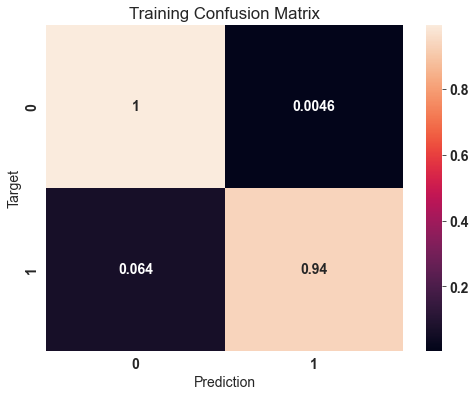

In [43]:
train_preds = predict_and_plot(X_train, train_target, 'Training')

Accuracy: 95.61%


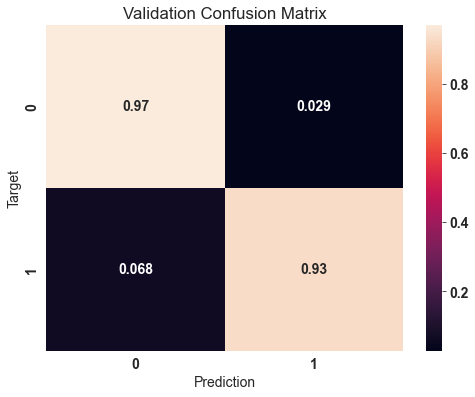

In [44]:
train_preds = predict_and_plot(X_val, val_target, 'Validation')

Accuracy: 97.37%


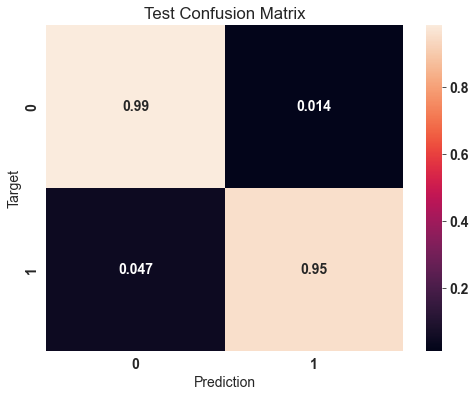

In [45]:
train_preds = predict_and_plot(X_test, test_target, 'Test')

* ### Decision Tree Model

In [47]:
model_2 = DecisionTreeClassifier( random_state = 42) 

In [48]:
model_2.fit(X_train , train_target)

DecisionTreeClassifier(random_state=42)

In [49]:
model_2.score(X_train,train_target)

1.0

In [50]:
model_2.score(X_val,val_target)

0.9473684210526315

In [51]:
model_2.score(X_test,test_target)

0.9473684210526315

* ### Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model_3 = RandomForestClassifier(n_jobs=-1 , random_state = 42)

In [56]:
model_3.fit(X_train , train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [57]:
model_3.score(X_train,train_target)

1.0

In [58]:
model_3.score(X_val,val_target)

0.9649122807017544

##### Model is giving very poor accuracy for Decision Tree & Random Forest. Logistic Regression is the best algorithm for the model.